# Importing library

In [13]:
import pandas as pd
import numpy as np

# Load dataset

In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLength(cm)', 'SepalWidth(cm)', 'PetalLength(cm)', 'PetalWidth(cm)', 'Species']
df = pd.read_csv(url, names=names)

# Dataset information

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength(cm)    150 non-null float64
SepalWidth(cm)     150 non-null float64
PetalLength(cm)    150 non-null float64
PetalWidth(cm)     150 non-null float64
Species            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Statistical summary

In [16]:
print(df.describe())

       SepalLength(cm)  SepalWidth(cm)  PetalLength(cm)  PetalWidth(cm)
count       150.000000      150.000000       150.000000      150.000000
mean          5.843333        3.054000         3.758667        1.198667
std           0.828066        0.433594         1.764420        0.763161
min           4.300000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.300000
50%           5.800000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000


# Data visualization with plotly

In [17]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import Image

# Histogram of Sepal Length

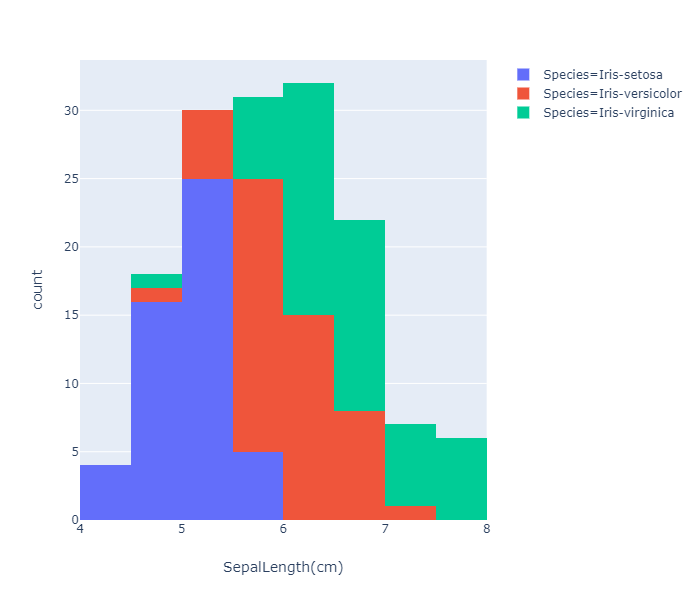

In [18]:
fig = px.histogram(df, x="SepalLength(cm)", color="Species")
Image(pio.to_image(fig, format='png'))

# Histogram of Sepal Width

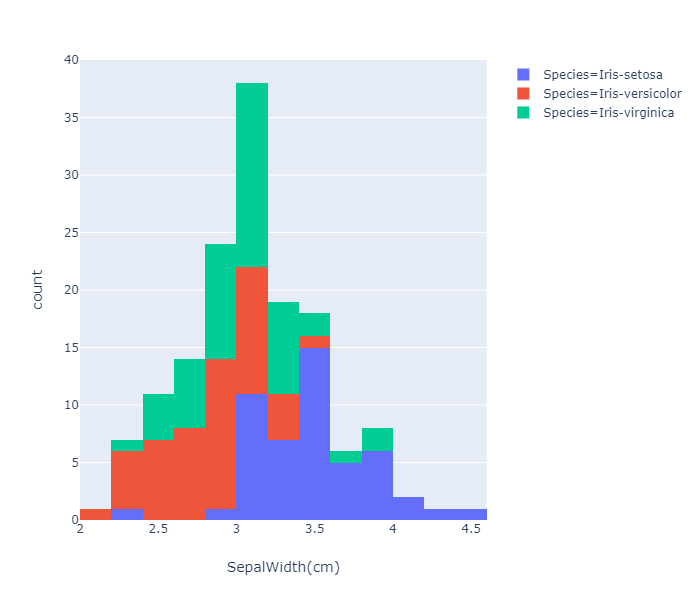

In [19]:
fig = px.histogram(df, x="SepalWidth(cm)", color="Species")
Image(pio.to_image(fig, format='png'))

# Histogram of Petal Length

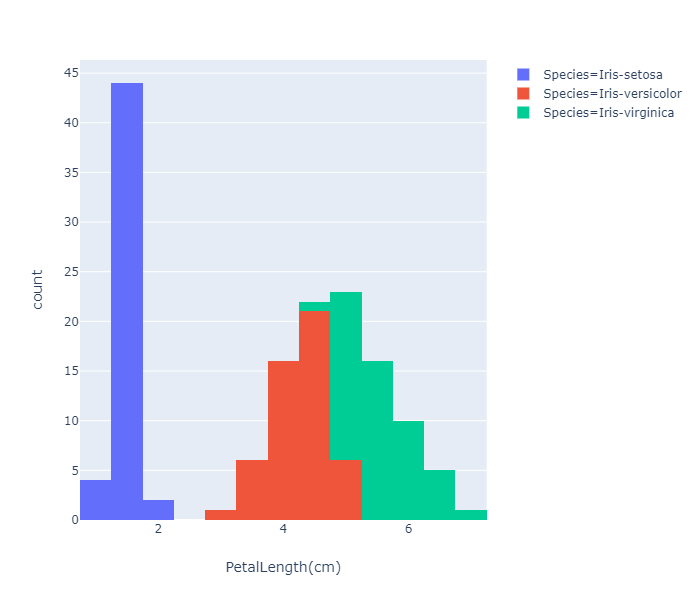

In [20]:
fig = px.histogram(df, x="PetalLength(cm)", color="Species")
Image(pio.to_image(fig, format='png'))

# Histogram of Petal Width

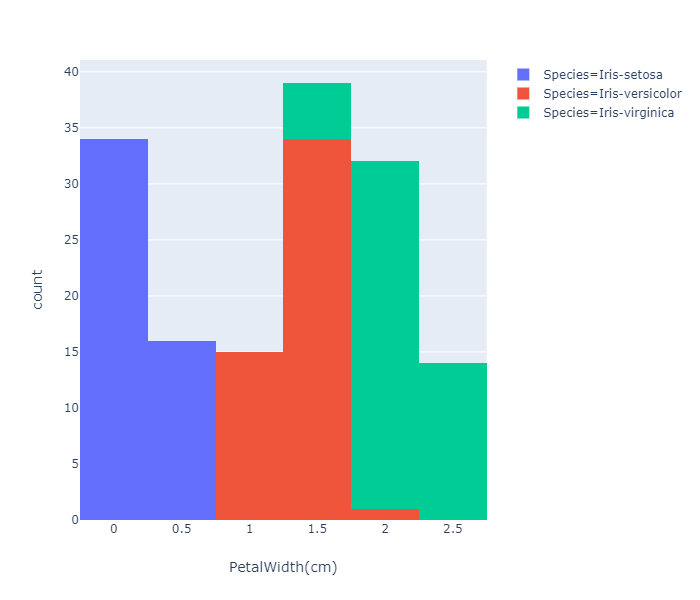

In [21]:
fig = px.histogram(df, x="PetalWidth(cm)", color="Species")
Image(pio.to_image(fig, format='png'))

# Distributions of Sepal Length

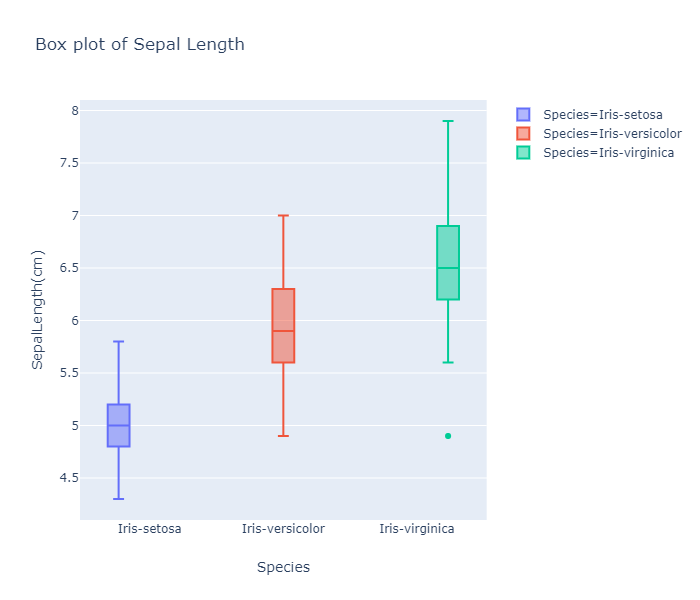

In [22]:
fig = px.box(df, x="Species", y="SepalLength(cm)", color="Species",
             title="Box plot of Sepal Length"
            )
Image(pio.to_image(fig, format='png'))

# Distributions of Sepal Width

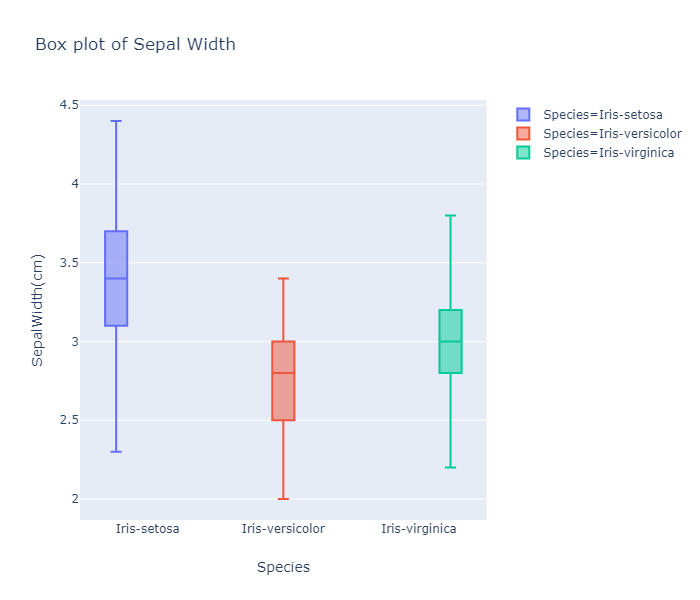

In [23]:
fig = px.box(df, x="Species", y="SepalWidth(cm)", color="Species",
             title="Box plot of Sepal Width"
            )
Image(pio.to_image(fig, format='png'))

# Distributions of Petal Length

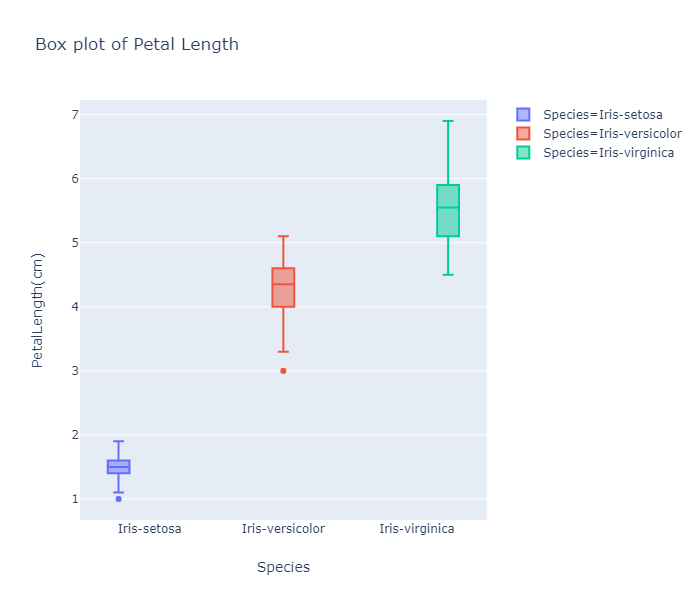

In [24]:
fig = px.box(df, x="Species", y="PetalLength(cm)", color="Species",
             title="Box plot of Petal Length"
            )
Image(pio.to_image(fig, format='png'))

# Distributions of Petal Width

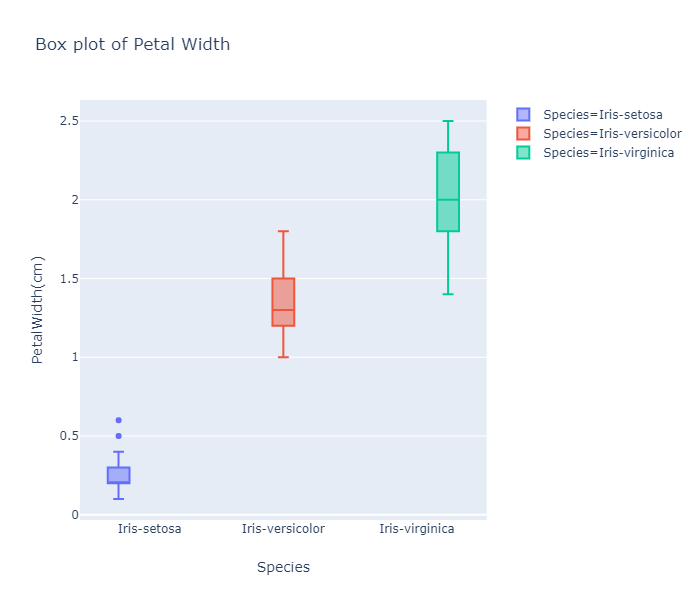

In [25]:
fig = px.box(df, x="Species", y="PetalWidth(cm)", color="Species",
             title="Box plot of Petal Width"
            )
Image(pio.to_image(fig, format='png'))

# Scatter Matrix

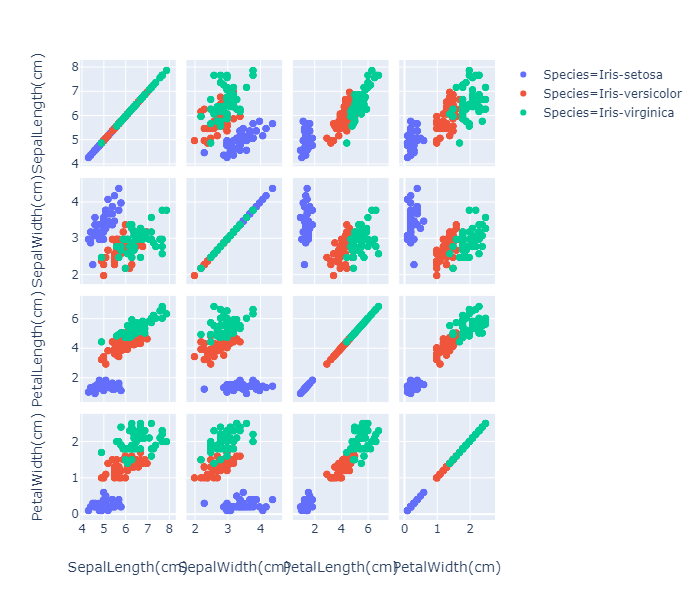

In [26]:
fig = px.scatter_matrix(df,
    dimensions=["SepalLength(cm)", "SepalWidth(cm)","PetalLength(cm)", "PetalWidth(cm)" ],
    color="Species")
Image(pio.to_image(fig, format='png'))

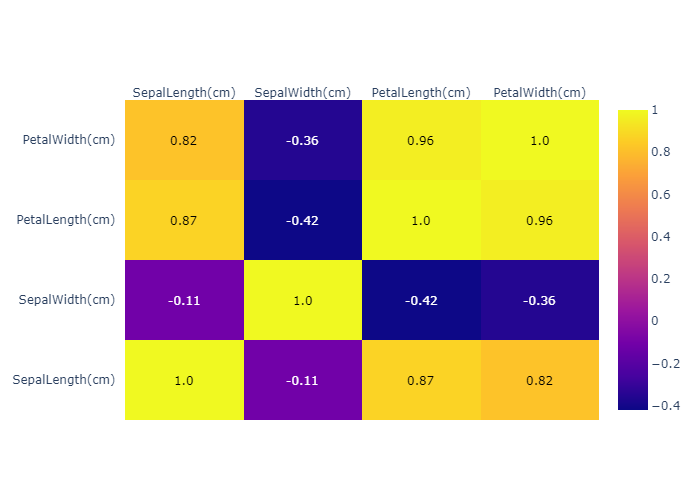

In [28]:
corrs = df.corr()

fig = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
Image(pio.to_image(fig, format='png'))

# Decision tree 


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [30]:
x=df.drop('Species',1)
target=df['Species']
decision_tree=DecisionTreeClassifier(random_state=12)
strat_k_fold=StratifiedKFold(n_splits=3, shuffle=True, random_state=21)
scores = cross_val_score(decision_tree, x, target, cv=strat_k_fold)
scores = (scores.mean())
print("The accuracy of decision tree is :",scores)

The accuracy of decision tree is : 0.9538398692810457


# K-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn= KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, x, target, cv=strat_k_fold)
scores = (scores.mean())
print("The accuracy of K-Nearest Neighbors is :",scores)

The accuracy of K-Nearest Neighbors is : 0.9669117647058822


# Support Vector Machine

In [33]:
from sklearn.svm import SVC

In [34]:
svm = SVC(gamma='auto',random_state=12)
scores = cross_val_score(svm, x, target, cv=strat_k_fold)
scores = (scores.mean())
print("The accuracy of Support Vector Machine is :",scores)

The accuracy of Support Vector Machine is : 0.9730392156862746


# Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gnb = GaussianNB()
scores = cross_val_score(gnb, x, target, cv=strat_k_fold)
scores = (scores.mean())
print("The accuracy of naive bayes is :",scores)

The accuracy of naive bayes is : 0.9538398692810457
